# CPEB3 Phylogenic Tree Analysis (in progress)

The protein that I am interested is **CPEB3** (cytoplasmic polyadenylation element-binding protein). A recent study found that **both memory storage and its underlying synaptic plasticity are mediated by the increase in level and in the aggregation of the prion-like translational regulator CPEB3**. Genetic ablation of CPEB3 impairs the maintenance of both hippocampal long-term potentiation and hippocampus-dependent spatial memory. We propose a model whereby persistence of long-term memory results from the assembly of CPEB3 into aggregates. These aggregates serve as functional prions and regulate local protein synthesis necessary for the maintenance of long-term memory.

Original material: The cpeb3 protein sequences accross the mammal were downloaded from http://www.orthodb.org/?level=40674&species=40674&query=EOG090A03XL

My hypothesis here is longer distance in CPEB3 phylogenic tree between species correlates with difference in memory capacity.  

**The figure below shows a circle phylogenic tree**, interestingly we found few species with significant more sequence changes in CPEB3. What are these species? What is their memory capacity? Does this phylogenic tree similar to a tradition evolutionary tree?

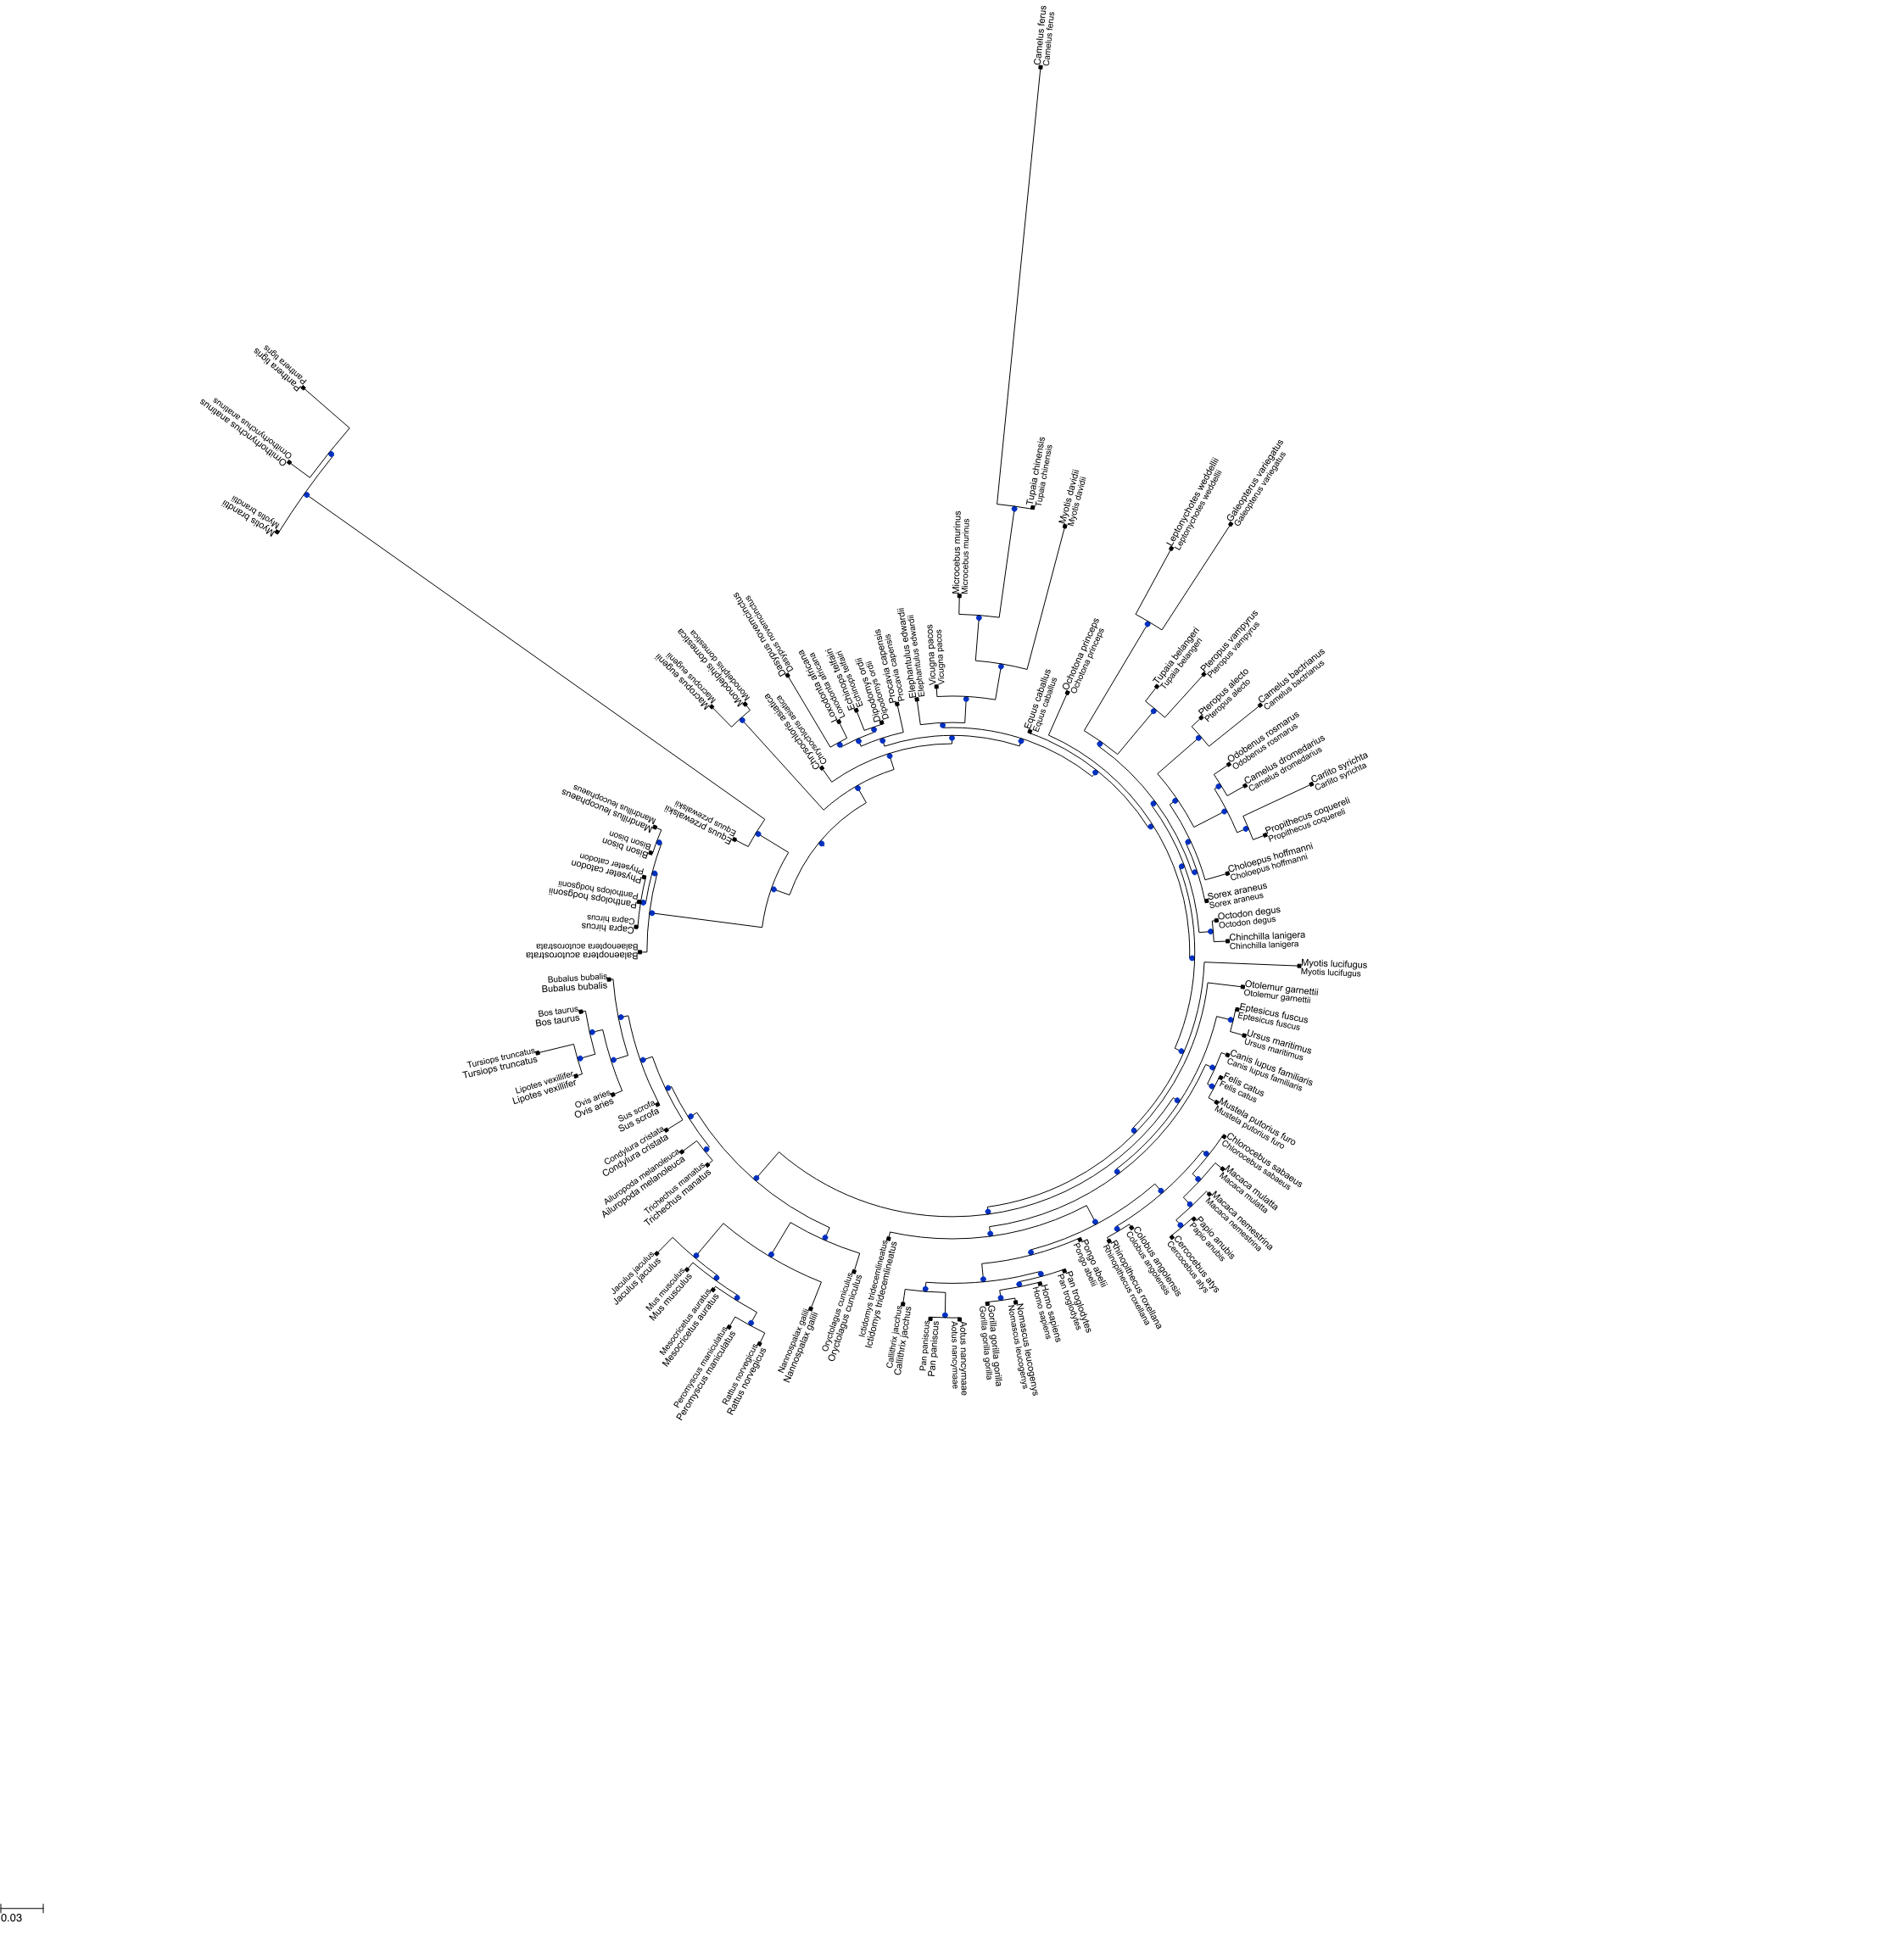

In [16]:
from IPython.display import Image
Image('cpeb3_circle.png')

For the 4 leaves whose brach distance is significantly longer than others, the corresponding species are:
1. Camel
2. Tiger
3. Brandt's bat
4. Platypus

Conclusion:
???

# Approach

Original material: The cpeb3 protein sequences accross the mammal were downloaded from http://www.orthodb.org/?level=40674&species=40674&query=EOG090A03XL

Here, I am using **ete3 toolkit** for phylogenic tree assembly. For demonstration, I used shell command in jupyter notebook.    

In [3]:
# Showing the first sequence in downloaded fasta file, notice here the taxo ID is not the traditional NCBI taxo ID.
! head -2 data/cpeb3.fasta

>10020:001482 {"pub_gene_id":"ENSDORG00000005647", "pub_og_id":"EOG090A03XL", "level":40674, "description":"cytoplasmic polyadenylation element binding protein 3 "}
NAFRTDNGNNLLPFQDRSRPYDTFNLHSLENSLMDMIRTDHEPLKGKHYPPSGPPMSFADIMWRNHFAGRMGINFHHPGTDNIMALNXXXXXXXXXXXXXXXXXXXPTRCQNGERVERYSRKVFVGGLPPDIDEXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXYAFLLFQEESSVQALIDACLEEDGKLYLCVSSPTIKDKPXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXELAMIMDRLYGGVCYAGIDTDPELKYPKGAGRVAFSNQQSYIAAISARFVQLQHNDIDKRVEVKPYVLDDQMCDECQGTRCGGKFAPFFCANVTCLQYYCEYCWASIHSRAGREFHKPLVKEGGDRPRHVPFRWS


In [6]:
# To utilize the ncbi database to convert the taxo ID into speicies name,
# I need to get rid of ':0001482' in '>10020:001482'
import re

with open('data/cpeb3.fasta', 'r+') as f:
    data = f.read()
    data = re.sub(':\w{6}', '', data)
    f.close()
    
with open('data/cpeb3_modified.fasta', 'w') as fwrite:
    fwrite.write(data)
    fwrite.close()

In [7]:
# Check the new format
! head -2 data/cpeb3_modified.fasta

>10020 {"pub_gene_id":"ENSDORG00000005647", "pub_og_id":"EOG090A03XL", "level":40674, "description":"cytoplasmic polyadenylation element binding protein 3 "}
NAFRTDNGNNLLPFQDRSRPYDTFNLHSLENSLMDMIRTDHEPLKGKHYPPSGPPMSFADIMWRNHFAGRMGINFHHPGTDNIMALNXXXXXXXXXXXXXXXXXXXPTRCQNGERVERYSRKVFVGGLPPDIDEXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXYAFLLFQEESSVQALIDACLEEDGKLYLCVSSPTIKDKPXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXELAMIMDRLYGGVCYAGIDTDPELKYPKGAGRVAFSNQQSYIAAISARFVQLQHNDIDKRVEVKPYVLDDQMCDECQGTRCGGKFAPFFCANVTCLQYYCEYCWASIHSRAGREFHKPLVKEGGDRPRHVPFRWS


In [8]:
# the goal here is to build a standard fasttree using ete3 toolkit
# -a indicates we are using a.a. sequences
# -o refers to the output folder
# I may need to use a more conventional tools here
! ete3 build -w standard_fasttree -a data/cpeb3_modified.fasta -o cpeb3_tree/ --clearall

Toolchain path: /Users/csyk2/anaconda3/envs/py27/bin/ete3_apps 
Toolchain version: 2.0.3


      --------------------------------------------------------------------------------
                  ETE build (3.0.0b36) - reproducible phylogenetic workflows 

      Citation: 

       Huerta-Cepas J, Serra F and Bork P. ETE 3: Reconstruction, analysis and
       visualization of phylogenomic data. Mol Biol Evol (2016)
       doi:10.1093/molbev/msw046

      (Note that a list of the external programs used to complete all necessary
      computations will be shown after workflow execution. Those programs should
      also be cited.)

      --------------------------------------------------------------------------------
      
INFO -  Testing x86-64  portable applications...
       clustalo: OK - 1.2.1
Dialign-tx not supported in OS X
       fasttree: OK - Usage for FastTree version 2.1.8 Double precision (No SSE3), OpenMP (1 threads):
         kalign: OK - Kalign version 2.04, Copyright (C) 

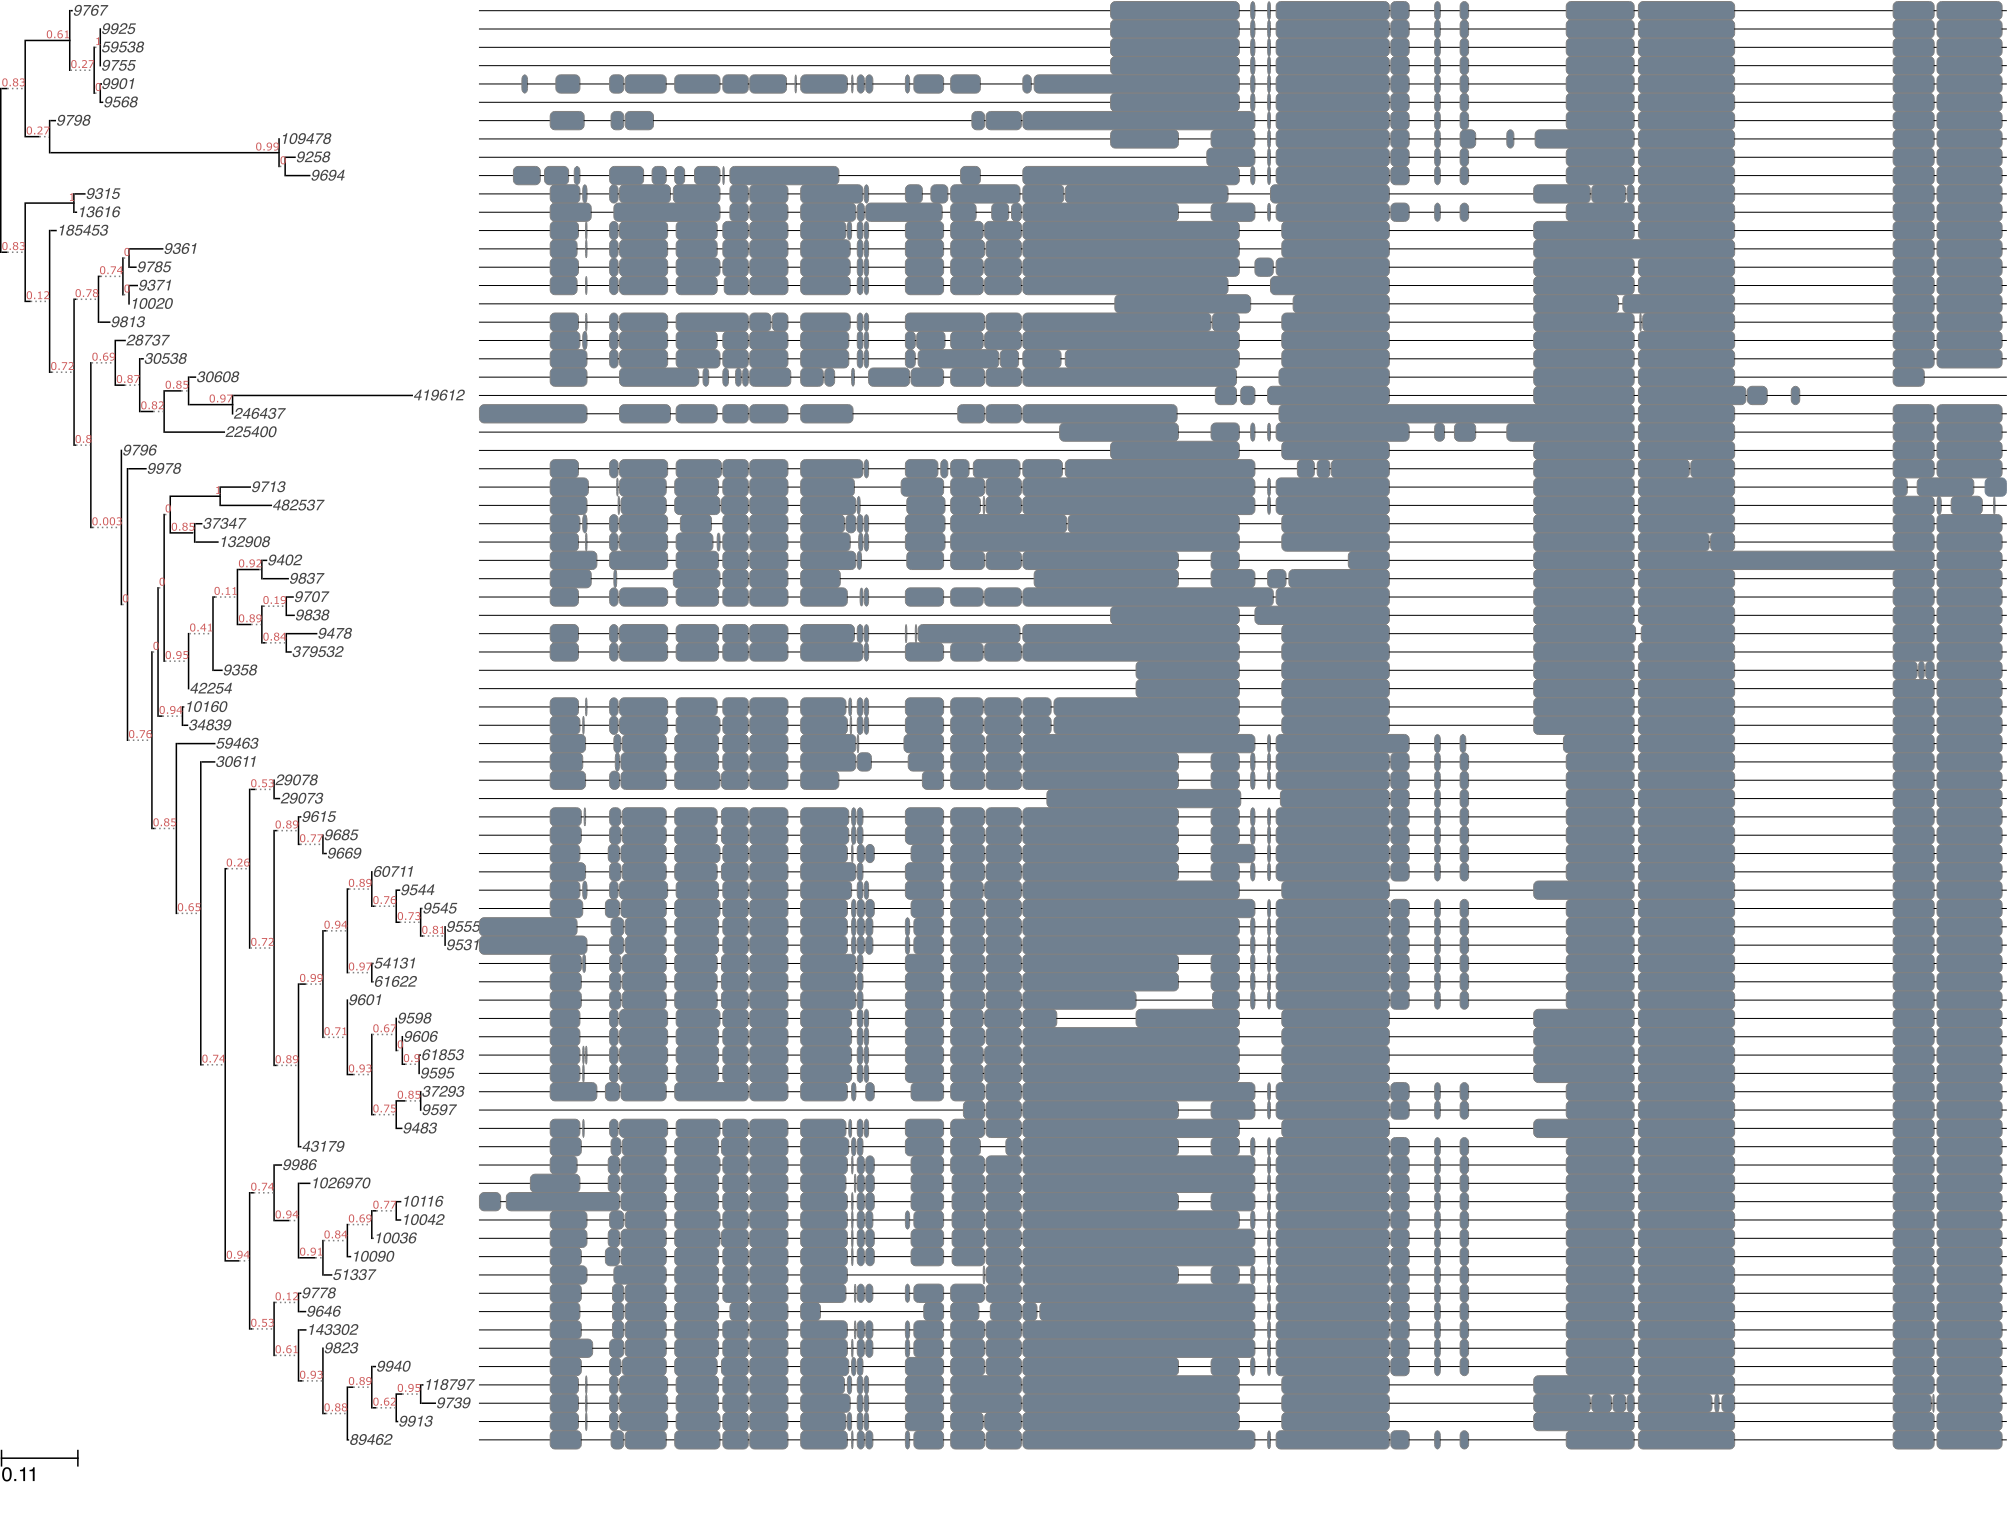

In [13]:
# One clear issue is that the fasta file uses organism ID rather than the organism name,
# thus, it is hard to 'read' this tree.from IPython.display import Image

Image(filename='cpeb3_tree/clustalo_default-none-none-fasttree_full/cpeb3_modified.fasta.final_tree.png')

In [13]:
# copy the .nw file to the main folder for annotations

! cp cpeb3_tree/clustalo_default-none-none-fasttree_full/cpeb3_modified.fasta.final_tree.nw cpeb3tree.nw

In [14]:
# To solve the issue of taxonomy, we use the annotation '--ncbi' and output it into a image:
# brca_tree.png

! ete3 annotate --ncbi -t cpeb3tree.nw | ete3 view --ncbi --image  cpeb3_tree.png --Iw 800

In [2]:
from ete3 import PhyloTree
t = PhyloTree('cpeb3tree.nw',
              alignment='cpeb3_tree/clustalo_default-none-none-fasttree_full/cpeb3_modified.fasta.final_tree.used_alg.fa',
              alg_format="fasta")

In [8]:
t_name_modified = t.annotate_ncbi_taxa(taxid_attr="name")

In [9]:
# The ncbi database ete3 provided cannot categorize '9478' which is Carlito syrichta

for n in t.get_leaves():
    if n.name == '9478':
        n.name = 'Carlito syrichta'
    try:
        n.name = t_name_modified[0][int(n.name)]
    except Exception as e:
        pass

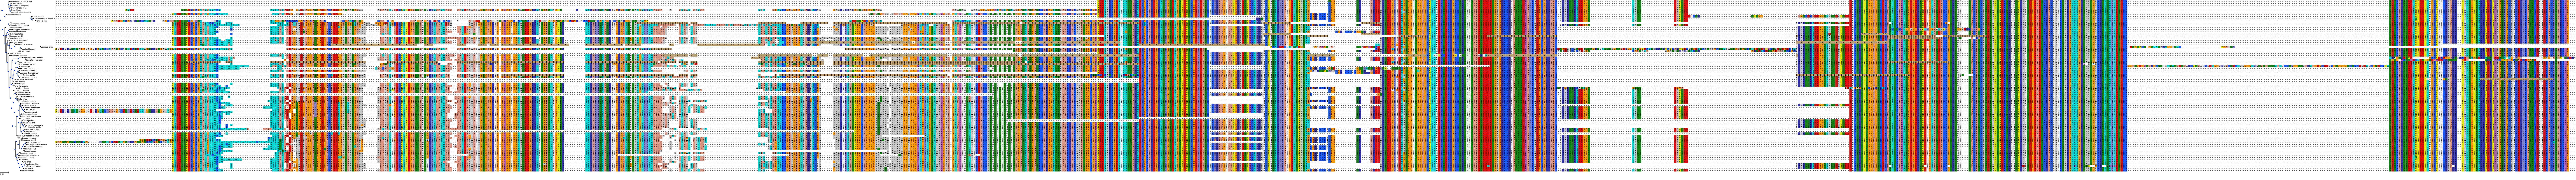

In [29]:
t.render('%%inline')

In [ ]:
# I tried bootstrap, however, it didn't run well, crashed everytime.

In [31]:
# Reference for species

for n in t.get_leaves():
    print n.name

Balaenoptera acutorostrata
Capra hircus
Pantholops hodgsonii
Physeter catodon
Bison bison
Mandrillus leucophaeus
Equus przewalskii
Myotis brandtii
Ornithorhynchus anatinus
Panthera tigris
Macropus eugenii
Monodelphis domestica
Chrysochloris asiatica
Dasypus novemcinctus
Loxodonta africana
Echinops telfairi
Dipodomys ordii
Procavia capensis
Elephantulus edwardii
Vicugna pacos
Microcebus murinus
Camelus ferus
Tupaia chinensis
Myotis davidii
Equus caballus
Ochotona princeps
Leptonychotes weddellii
Galeopterus variegatus
Tupaia belangeri
Pteropus vampyrus
Pteropus alecto
Camelus bactrianus
Odobenus rosmarus
Camelus dromedarius
Carlito syrichta
Propithecus coquereli
Choloepus hoffmanni
Sorex araneus
Octodon degus
Chinchilla lanigera
Myotis lucifugus
Otolemur garnettii
Eptesicus fuscus
Ursus maritimus
Canis lupus familiaris
Felis catus
Mustela putorius furo
Chlorocebus sabaeus
Macaca mulatta
Macaca nemestrina
Papio anubis
Cercocebus atys
Colobus angolensis
Rhinopithecus roxellana
Pongo abeli